# Homework 2

### Q4 - Smile Recognition

In [1]:
import scipy.io as sio 
import numpy as np

### 4 a)

In [2]:
##### Part a #####

# load the training data X and the training labels y
matlab_data_file = sio.loadmat('face_emotion_data.mat') 
X = matlab_data_file['X']
y = matlab_data_file['y']

# n = number of data points # p = number of features
n, p = np.shape(X)

# Solve the least-squares solution. w is the list of # weight coefficients
inv_XTX = np.linalg.inv(np.dot(X.T, X))

w = np.dot(np.dot(inv_XTX, X.T), y)

print(w)

[[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


### 4 c)

The first 4 features seem to be the most important. </p>
Reason: </p>
From the weight vector: </p>
w = [[ 0.94366942]
 [0.21373778]
 [0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838]
 [-0.16644364]] </p>

We could see that the first 4 features have higher absolute values than other features, meaning they will have a heavier weight on the label.</p> 
So these features will be more important than others in recognizing smiling faces.
 

### 4 d)

We can use the first (index 0), thrid (index 2) and fourth (index 3) features to build the classifier,</p> 
because the three features have the largest weights and they have different signs, so they can weight</p> 
y_hat to different directions (-1 or +1) </p>
w = [[ 0.94366942]
 [ 0.26641775]
 [-0.39221373] </p>

With this classifier, we only extract the three features, multiply with the new weight vector</p> 
to get the result a (1*1). </p>
y_hat = +1, if a > 0 </p>
y_hat = -1, if a <= 0


### 4 e)

In [94]:
# Function to record and calculate the mean of error rates from cross validation

def cross_validation(X, y, N):
    '''
    Calculate the average accuracy of the prdiction by N rounds

    Inputs:
      X: feature matrix (n * p) 
         where n = # data points
         and   p = # features
      y: label matrix (n * 1)
      N: # of rounds/ # of split groups
    
    Return:
      (float) average error rate over N rounds of tests
    '''

    # n = number of data points
    n, _ = np.shape(X)

    error_rates = []

    for i in range(int(n/N)):

        # Split X and y
        lb = i * N
        ub = (i + 1) * N
        X_hold = X[lb:ub]
        y_hold = y[lb:ub]
        X_learn = np.concatenate((X[:lb], X[ub:]))
        y_learn = np.concatenate((y[:lb], y[ub:]))

        # Calculate z, which has the same sign as y_hat
        inv_XTX = np.linalg.inv(np.dot(X_learn.T, X_learn))
        w = np.dot(np.dot(inv_XTX, X_learn.T), y_learn)
        z = np.dot(X_hold, w)

        # Check if z and y_hold have the different sign (estimate is wrong)
        # (so we know if y_hat and y_hold have the different sign)
        err = (z * y_hold < 0).sum() / N
        error_rates.append(err)
    
    return np.mean(error_rates)


In [95]:
# Split into N = 8 sets, test N = 8 rounds
N = 8

# Extract the three target features
new_X = X[:, [0,1,2]]

# Cross-validation on 3 features and 9 features
acc_3 = cross_validation(new_X, y, 8)
acc_9 = cross_validation(X, y, 8)

print("With 3 features we chose, the average error rate among {} groups is {}".format(N, acc_3))
print("With all 9 features we chose, the average error rate among {} groups is {}".format(N, acc_9))

With 3 features we chose, the average error rate among 8 groups is 0.0625
With all 9 features we chose, the average error rate among 8 groups is 0.0390625


### 4 f)

The estimated error rate using all 9 features is 0.0390625 </p>
The estimated error rate using the 3 features we chose in (d) above is 0.0625

### 5

In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# load x and y vectors
d = sio.loadmat('polydata.mat') 
z = d['x']
y = d['y']

# n = number of data points
# N = number of points to use for interpolation
# z = points where interpolant is evaluated
# p = array to store the values of the interpolated polynomials n = z.size
N = 100
z_test = np.linspace(np.min(z), np.max(z), N)
p = np.zeros((3, N))

for d in [1, 2, 3]:

    # generate X-matrix for this choice of d
    l = [np.array(z**i) for i in range(d+1)]
    X = np.hstack((l))

    # solve least-squares problem. w is the list of polynomial coefficients
    inv_XTX = np.linalg.inv(np.dot(X.T, X))
    w = np.dot(np.dot(inv_XTX, X.T), y)

    # evaluate best-fit polynomial at all points z_test ,and store the result in p
    # NOTE (optional): this can be done in one line with the polyval command!
    coef = list(w.T[0])
    coef.reverse()
    p[d - 1] = np.polyval(coef, z_test)

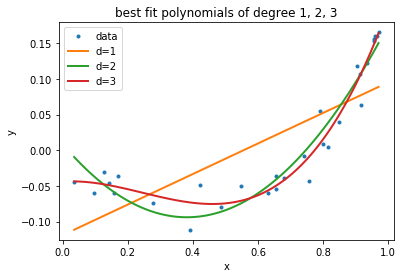

In [4]:
# plot the datapoints and the best-fit polynomials 
plt.plot(z, y, '.', z_test , p[0, :], z_test , p[1, :], z_test , p[2, :], linewidth=2)
plt.legend(['data', 'd=1', 'd=2', 'd=3'], loc='upper left') 
plt.title('best fit polynomials of degree 1, 2, 3') 
plt.xlabel('x')
plt.ylabel('y')
plt.show()